In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [25]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [26]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [27]:
#Calculamos el numero total de la población "n"

Mexico['review_scores_communication'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_communication
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [28]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['review_scores_communication'].max()
Min = Mexico['review_scores_communication'].min()
Limites = [Min, Max]
Limites

[3.86, 5.0]

In [29]:
# Calculamos el rango R
R = Max - Min
R

1.1400000000000001

In [30]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [31]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.07265945255567237

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [32]:
# Categorización de variables
intervalos = np.linspace (3.86, 5, 16)
intervalos

array([3.86 , 3.936, 4.012, 4.088, 4.164, 4.24 , 4.316, 4.392, 4.468,
       4.544, 4.62 , 4.696, 4.772, 4.848, 4.924, 5.   ])

In [33]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [34]:
# Creamos las ctegorias en la columna numerica
Mexico['review_scores_communication'] = pd.cut ( x = Mexico ['review_scores_communication'], bins = intervalos, labels = categorias )
Mexico['review_scores_communication']

0        Categoria15
1        Categoria13
2        Categoria14
3        Categoria15
4        Categoria12
            ...     
26577    Categoria15
26578    Categoria15
26579    Categoria15
26580    Categoria15
26581    Categoria15
Name: review_scores_communication, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [35]:
table1 = freq_tbl(Mexico['review_scores_communication'])
table1

,review_scores_communication,frequency,percentage,cumulative_perc
0,Categoria15,15250,0.573696,0.573783
1,Categoria14,4784,0.179971,0.753781
2,Categoria13,2250,0.084644,0.838438
3,Categoria12,1481,0.055714,0.894161
4,Categoria11,846,0.031826,0.925991
5,Categoria10,512,0.019261,0.945255
6,Categoria9,479,0.018020,0.963278
7,Categoria2,272,0.010232,0.973512
8,Categoria8,223,0.008389,0.981902
9,Categoria7,192,0.007223,0.989126


In [36]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_communication,frequency
0,Categoria15,15250
1,Categoria14,4784
2,Categoria13,2250
3,Categoria12,1481
4,Categoria11,846
5,Categoria10,512
6,Categoria9,479
7,Categoria2,272
8,Categoria8,223
9,Categoria7,192


In [37]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_communication')
Filtro_index

,frequency
review_scores_communication,
Categoria15,15250
Categoria14,4784
Categoria13,2250
Categoria12,1481
Categoria11,846
Categoria10,512
Categoria9,479
Categoria2,272
Categoria8,223


Text(0, 0.5, 'Frecuencia')

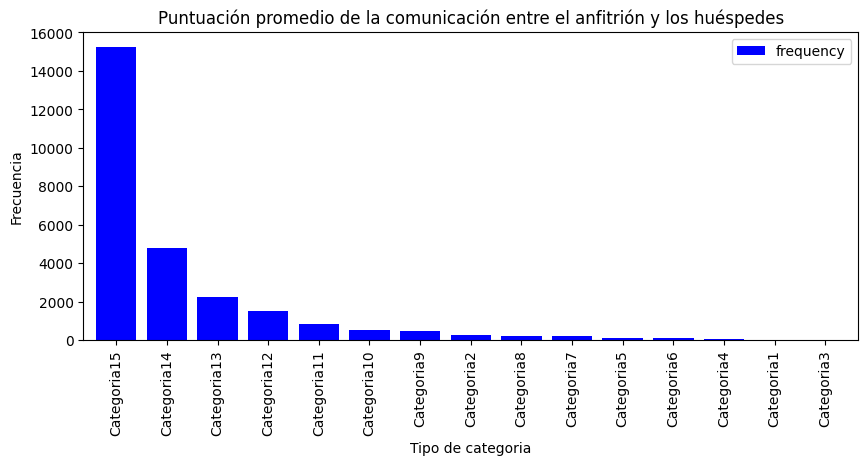

In [38]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de la comunicación entre el anfitrión y los huéspedes')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')